In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
training_set = pd.read_csv("data/mini_data/data/training_set/log_mini.csv")
training_set.hist_user_behavior_reason_start = training_set.hist_user_behavior_reason_start.astype('category')
training_set.hist_user_behavior_reason_end = training_set.hist_user_behavior_reason_end.astype('category')
training_set.context_type = training_set.context_type.astype('category')
training_set.date = training_set.date.apply(pd.to_datetime)


track_features = pd.read_pickle("data/pickles/track_features.pkl")

In [3]:
track_features.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [4]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [5]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
session_length                     167880 non-null int64
track_id_clean                     167880 non-null object
skip_1                             167880 non-null bool
skip_2                             167880 non-null bool
skip_3                             167880 non-null bool
not_skipped                        167880 non-null bool
context_switch                     167880 non-null int64
no_pause_before_play               167880 non-null int64
short_pause_before_play            167880 non-null int64
long_pause_before_play             167880 non-null int64
hist_user_behavior_n_seekfwd       167880 non-null int64
hist_user_behavior_n_seekback      167880 non-null int64
hist_user_behavior_is_shuffle      167880 non-null bool
hour_of_day                        16

In [6]:
acoustic_vectors = (
    track_features.set_index(
        'track_id'
    )[[c for c in track_features.columns if 'acoustic_vector' in c]]
    .rename(columns={f'acoustic_vector_{n}':f'av{n}' for n in range(8)})
    .reset_index()
)
acoustic_vectors.head()

,track_id,av0,av1,av2,av3,av4,av5,av6,av7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [83]:
session_vectors = (
    training_set[['session_id','session_position','track_id_clean']]
    .merge(
        acoustic_vectors,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
session_vectors.head()

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [84]:
# cumsum for av0 at row 2 should be:
-0.815775 + -0.713646

-1.5294210000000001

In [86]:
# session_vectors.set_index(['session_id','session_position','track_id'])
# session_vectors.cumsum()
session_vec_cumsum = session_vectors.drop(columns=['track_id']).groupby(['session_id']).cumsum()
session_vec_cumsum.head()

,session_position,av0,av1,av2,av3,av4,av5,av6,av7
0,1,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,3,-1.529421,0.750127,0.540475,-0.014194,-0.716538,0.081808,-0.718898,0.363747
2,6,-2.271962,1.125727,0.793135,-0.063201,-1.016282,0.145149,-1.205588,0.545351
3,10,-2.977077,1.443289,1.082276,-0.102122,-1.409640,0.237868,-1.570006,0.830954
4,15,-3.845567,1.774569,1.292754,-0.017381,-1.742928,0.212162,-2.080355,1.013269


In [87]:
session_vec_cumsum.shape

(167880, 9)

In [93]:
sv2 = session_vectors.copy()
for i in range(8):
    sv2[f'av{i}_pastavg'] = session_vec_cumsum[f'av{i}'] - session_vectors[f'av{i}']
    sv2[f'av{i}_pastavg'][session_vectors.session_position == 1] = np.NaN
    sv2[f'av{i}_pastavg'] /= session_vectors.session_position
    
sv2.head()

/Users/Austin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,av0_pastavg,av1_pastavg,av2_pastavg,av3_pastavg,av4_pastavg,av5_pastavg,av6_pastavg,av7_pastavg
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,-0.407887,0.193205,0.115080,0.014014,-0.166687,0.007726,-0.176795,0.102913
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,-0.509807,0.250042,0.180158,-0.004731,-0.238846,0.027269,-0.239633,0.121249
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,-0.567990,0.281432,0.198284,-0.015800,-0.254071,0.036287,-0.301397,0.136338
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,-0.595415,0.288658,0.216455,-0.020424,-0.281928,0.047574,-0.314001,0.166191


In [94]:
sv2.to_pickle("data/pickles/session_accoustic_vec_with_past_avg.pkl")

***

Now what if we split up the vectors by averege skipped and average not skipped past vectors

In [69]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [97]:
# Using skip_2 as the ground truth
training_set['skipped'] = (training_set.skip_2).astype('int32')
training_set = training_set.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])

In [96]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0


In [72]:
acoustic_vectors.head()

,track_id,av0,av1,av2,av3,av4,av5,av6,av7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [98]:
# Merge the acoustic_vectors in with the relevant data
session_vectors = session_vectors.merge(
    training_set[['session_id','session_position','skipped']],
    how='left',
    on=['session_id','session_position']
)
session_vectors.head(15)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,t_c815228b-3212-4f9e-9d4f-9cb19b248184,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,t_e23c19f5-4c32-4557-aa44-81372c2e3705,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,-0.921928,0.359740,0.293674,0.115302,-0.274987,0.043193,-0.444351,0.211909,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,1


In [124]:
session_vectors.head()
skip_vecs = session_vectors.copy()
play_vecs = session_vectors.copy()
for i in range(8):
    skip_vecs[f'av{i}'] *= session_vectors.skipped
    play_vecs[f'av{i}'] *= (session_vectors.skipped != 1).astype('int32')

In [125]:
skip_vecs.head(10)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,t_c815228b-3212-4f9e-9d4f-9cb19b248184,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,t_e23c19f5-4c32-4557-aa44-81372c2e3705,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,-0.921928,0.359740,0.293674,0.115302,-0.274987,0.043193,-0.444351,0.211909,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,1


In [126]:
play_vecs.head(10)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,t_c815228b-3212-4f9e-9d4f-9cb19b248184,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,t_e23c19f5-4c32-4557-aa44-81372c2e3705,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,1


In [137]:
skip_cumsum = skip_vecs.drop(columns=['track_id','skipped','session_position','skipped']).groupby(['session_id']).cumsum()
play_cumsum = play_vecs.drop(columns=['track_id','skipped','session_position','skipped']).groupby(['session_id']).cumsum()
skip_cumsum.head(10)

,av0,av1,av2,av3,av4,av5,av6,av7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836
7,-1.670340,0.681716,0.531162,0.118782,-0.590274,0.075624,-0.909046,0.412745
8,-2.414752,0.990416,0.761287,0.185275,-0.832823,0.100994,-1.312256,0.572094
9,-3.061974,1.306517,1.012616,0.143743,-1.085182,0.160965,-1.625952,0.698516


In [138]:
for c in skip_cumsum.columns:
    # Average the columns
    skip_cumsum[c] = (skip_cumsum[c] - (skip_vecs[c] * session_vectors.skipped)) / skip_vecs.session_position
    play_cumsum[c] = (play_cumsum[c] - (skip_vecs[c] * (session_vectors.skipped != 1).astype('int32'))) / skip_vecs.session_position
    # Clear the first rows
    skip_cumsum[c][skip_vecs.session_position == 1] = np.NaN
    play_cumsum[c][skip_vecs.session_position == 1] = np.NaN
skip_cumsum.head(30)

,av0,av1,av2,av3,av4,av5,av6,av7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,-0.093551,0.040247,0.029686,0.000435,-0.039411,0.004054,-0.058087,0.025104
8,-0.185593,0.075746,0.059018,0.013198,-0.065586,0.008403,-0.101005,0.045861
9,-0.241475,0.099042,0.076129,0.018528,-0.083282,0.010099,-0.131226,0.057209


In [139]:
skip_cumsum.columns = [f"skip_{c}" for c in skip_cumsum.columns]
play_cumsum.columns = [f"play_{c}" for c in play_cumsum.columns]
skip_cumsum.head()

,skip_av0,skip_av1,skip_av2,skip_av3,skip_av4,skip_av5,skip_av6,skip_av7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
play_cumsum.head()

,play_av0,play_av1,play_av2,play_av3,play_av4,play_av5,play_av6,play_av7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.764710,0.375064,0.270238,-0.007097,-0.358269,0.040904,-0.359449,0.181873
2,-0.757321,0.375242,0.264378,-0.021067,-0.338761,0.048383,-0.401863,0.181784
3,-0.744269,0.360822,0.270569,-0.025530,-0.352410,0.059467,-0.392501,0.207739
4,-0.769113,0.354914,0.258551,-0.003476,-0.348586,0.042432,-0.416071,0.202654


In [144]:
session_vectors.shape, skip_cumsum.shape, play_cumsum.shape

((167880, 12), (167880, 8), (167880, 8))

In [146]:
full_session_vecs = pd.concat(
    [
        session_vectors,
        skip_cumsum,
        play_cumsum
    ],
    axis=1
)
full_session_vecs.head()

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,...,skip_av6,skip_av7,play_av0,play_av1,play_av2,play_av3,play_av4,play_av5,play_av6,play_av7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,...,0.0,0.0,-0.764710,0.375064,0.270238,-0.007097,-0.358269,0.040904,-0.359449,0.181873
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,...,0.0,0.0,-0.757321,0.375242,0.264378,-0.021067,-0.338761,0.048383,-0.401863,0.181784
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,...,0.0,0.0,-0.744269,0.360822,0.270569,-0.025530,-0.352410,0.059467,-0.392501,0.207739
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,...,0.0,0.0,-0.769113,0.354914,0.258551,-0.003476,-0.348586,0.042432,-0.416071,0.202654


In [147]:
full_session_vecs.to_pickle("data/pickles/full_session_vecs.pkl")

***

How well can this predict?

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [150]:
df = full_session_vecs.set_index(['session_id','session_position'])
df.head()

track_id  \
session_id                             session_position                                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                 t_0479f24c-27d2-46d6-a00c-7ec928f2b539   
                                       2                 t_9099cd7b-c238-47b7-9381-f23f2c1d1043   
                                       3                 t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   
                                       4                 t_23cff8d6-d874-4b20-83dc-94e450e8aa20   
                                       5                 t_64f3743c-f624-46bb-a579-0f3f9a07a123   

                                                              av0       av1  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.815775  0.386409   
                                       2                -0.713646  0.363718   
                                       3                -0.742541  0.375599   
                                       4                -0.705116  0.317562   
                                       5                -0.868489  0.331280   

                                                              av2       av3  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                 0.230160  0.028028   
                                       2                 0.310315 -0.042222   
                                       3                 0.252660 -0.049007   
                                       4                 0.289141 -0.038920   
                                       5                 0.210478  0.084740   

                                                              av4       av5  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.333373  0.015452   
                                       2                -0.383164  0.066357   
                                       3                -0.299745  0.063341   
                                       4                -0.393358  0.092719   
                                       5                -0.333287 -0.025706   

                                                              av6       av7  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.353590  0.205826   
                                       2                -0.365308  0.157920   
                                       3                -0.486689  0.181604   
                                       4                -0.364418  0.285603   
                                       5                -0.510350  0.182315   

                                                         skipped  ...  \
session_id                             session_position           ...   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                       0  ...   
                                       2                       0  ...   
                                       3                       0  ...   
                                       4                       0  ...   
                                       5                       0  ...   

                                                         skip_av6  skip_av7  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                      NaN       NaN   
                                       2                      0.0       0.0   
                                       3                      0.0       0.0   
                                       4                      0.0       0.0   
                                       5                      0.0       0.0   

                                                         play_av0  play_av1  \
session_id                      

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 167880 entries, (0_00006f66-33e5-4de7-a324-2d18e439fc1e, 1) to (0_0eaeef5d-25e9-4429-bd55-af15d3604c9f, 20)
Data columns (total 26 columns):
track_id    167880 non-null object
av0         167880 non-null float64
av1         167880 non-null float64
av2         167880 non-null float64
av3         167880 non-null float64
av4         167880 non-null float64
av5         167880 non-null float64
av6         167880 non-null float64
av7         167880 non-null float64
skipped     167880 non-null int32
skip_av0    157880 non-null float64
skip_av1    157880 non-null float64
skip_av2    157880 non-null float64
skip_av3    157880 non-null float64
skip_av4    157880 non-null float64
skip_av5    157880 non-null float64
skip_av6    157880 non-null float64
skip_av7    157880 non-null float64
play_av0    157880 non-null float64
play_av1    157880 non-null float64
play_av2    157880 non-null float64
play_av3    157880 non-null float64
play_av4    157880 n

In [163]:
X.describe()

,av0,av1,av2,av3,av4,av5,av6,av7,skip_av0,skip_av1,...,skip_av6,skip_av7,play_av0,play_av1,play_av2,play_av3,play_av4,play_av5,play_av6,play_av7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,157880.000000,157880.000000,...,157880.000000,157880.000000,157880.000000,157880.000000,157880.000000,157880.000000,157880.000000,157880.000000,157880.000000,157880.000000
mean,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859,-0.223172,0.115061,...,-0.122963,0.026433,-0.252126,0.132415,0.101856,-0.009563,-0.067026,0.024853,-0.138270,0.028450
std,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958,0.225344,0.109377,...,0.155327,0.112430,0.250939,0.127578,0.104128,0.140201,0.173021,0.059882,0.178231,0.137286
min,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647,-0.920648,-0.897800,...,-0.606605,-0.765918,-1.020861,-0.996409,-0.607084,-0.741746,-0.920470,-0.654313,-0.651268,-0.890581
25%,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752,-0.393206,0.027725,...,-0.230233,0.000000,-0.421959,0.047170,0.032985,-0.056124,-0.175290,-0.003887,-0.248220,0.000000
50%,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839,-0.183337,0.112092,...,-0.118249,0.036266,-0.211801,0.123282,0.094190,0.001573,-0.078984,0.011250,-0.133997,0.043193
75%,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377,-0.000866,0.194101,...,-0.011849,0.091364,-0.040067,0.215266,0.168490,0.048538,0.000000,0.050898,-0.039154,0.100154
max,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213,0.773894,0.609220,...,0.800248,0.706887,0.889095,0.735626,0.527492,0.905541,0.797513,0.330702,0.895026,0.965369


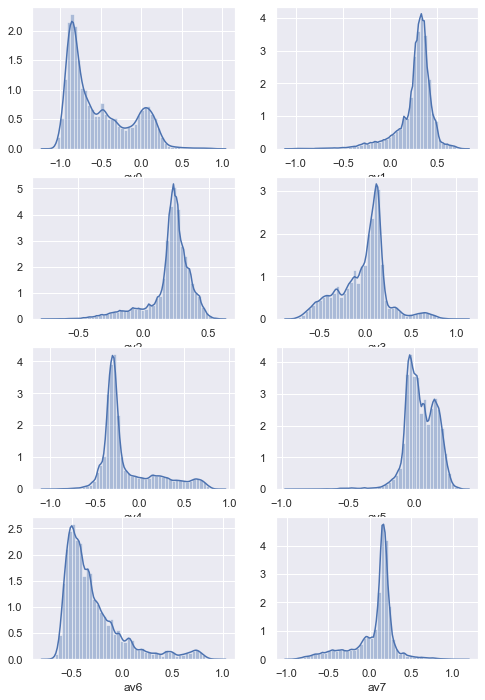

In [166]:
plt.figure(figsize=(8,12))
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.distplot(X[f'av{i}'])


In [168]:
X = df.drop(columns=['track_id','skipped']).fillna(X.mean())
y = df.skipped

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=2
)

In [179]:
rfc = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=200
).fit(X_train,y_train)

print("RFC Train score: %.5f" % rfc.score(X_train,y_train))
print("RFC Train score: %.5f" % rfc.score(X_test,y_test))

RFC Train score: 0.84177
RFC Train score: 0.81570


`XGBoost` Version:

In [187]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.15,
    random_state=2
)

In [191]:
xgb = XGBClassifier(
    n_estimators=100000,
    max_depth=10,
    learning_rate=0.05,
    subsample=1,
   min_child_weight=1,
   colsample_bytree=.8
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds=20
)


print("XGB Train score: %.5f" % xgb.score(X_train,y_train))
print("XGB Train score: %.5f" % xgb.score(X_test,y_test))

[0]	validation_0-error:0.213889	validation_1-error:0.233812
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.184231	validation_1-error:0.208397
[2]	validation_0-error:0.178747	validation_1-error:0.202944
[3]	validation_0-error:0.174364	validation_1-error:0.198549
[4]	validation_0-error:0.172374	validation_1-error:0.195902
[5]	validation_0-error:0.169478	validation_1-error:0.194631
[6]	validation_0-error:0.167768	validation_1-error:0.192725
[7]	validation_0-error:0.165946	validation_1-error:0.190131
[8]	validation_0-error:0.164871	validation_1-error:0.190396
[9]	validation_0-error:0.162984	validation_1-error:0.189072
[10]	validation_0-error:0.161816	validation_1-error:0.188489
[11]	validation_0-error:0.160825	validation_1-error:0.188754
[12]	validation_0-error:0.160162	validation_1-error:0.187801
[13]	validation_0-error:0.158882	validation_1-error:0.18

In [193]:
import pickle

In [194]:
with open("data/pickles/best_xgbc_0.86test.pkl",'wb') as f:
    pickle.dump(xgb,f)
!ls data/pickles

best_xgbc_0.86test.pkl                  session_accoustic_vec_with_past_avg.pkl
full_session_vecs.pkl                   track_features.pkl


***

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [196]:
X_train.shape

(107023, 24)

In [198]:
m = Sequential()
m.add(Dense(32,activation='relu',input_shape=(24,)))
m.add(Dropout(0.2))
m.add(Dense(64,activation='relu'))
m.add(Dropout(0.2))
m.add(Dense(64,activation='relu'))
m.add(Dropout(0.2))
m.add(Dense(1,activation='softmax'))
m.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [201]:
m.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=200,
    validation_data=(X_val,y_val),
    callbacks=[EarlyStopping(patience=20)]
)

Train on 107023 samples, validate on 18887 samples
Epoch 1/200
107023/107023 [==============================] - 7s 66us/sample - loss: 7.3786 - accuracy: 0.5161 - val_loss: 7.2431 - val_accuracy: 0.5250
Epoch 2/200
107023/107023 [==============================] - 5s 46us/sample - loss: 7.3786 - accuracy: 0.5161 - val_loss: 7.2431 - val_accuracy: 0.5250
Epoch 3/200
107023/107023 [==============================] - 5s 51us/sample - loss: 7.3786 - accuracy: 0.5161 - val_loss: 7.2431 - val_accuracy: 0.5250
Epoch 4/200
107023/107023 [==============================] - 5s 46us/sample - loss: 7.3786 - accuracy: 0.5161 - val_loss: 7.2431 - val_accuracy: 0.5250
Epoch 5/200
107023/107023 [==============================] - 5s 44us/sample - loss: 7.3786 - accuracy: 0.5161 - val_loss: 7.2431 - val_accuracy: 0.5250
Epoch 6/200
107023/107023 [==============================] - 5s 42us/sample - loss: 7.3786 - accuracy: 0.5161 - val_loss: 7.2431 - val_accuracy: 0.5250
Epoch 7/200
107023/107023 [==========

In [203]:
print("Train score...")
m.evaluate(X_train,y_train)
print("\nTest score...") 
m.evaluate(X_test,y_test)

Train score...
107023/107023 [==============================] - 2s 21us/sample - loss: 7.3786 - accuracy: 0.5161

Test score...
41970/41970 [==============================] - 1s 21us/sample - loss: 7.3757 - accuracy: 0.5163


[7.375733746930137, 0.5163212]